In [1]:
import numpy as np
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.ensemble import RandomForestRegressor

import os
print(os.listdir("../machine_learning"))

['.git', '.gitignore', '.ipynb_checkpoints', 'csv_results_to_geojson.ipynb', 'data_base', 'Evaluation Truncated Model Neural Network-FullData.ipynb', 'Evaluation Truncated Model Neural Network.ipynb', 'file.csv', 'get-pip.py', 'Images', 'Include', 'Lib', 'ML_Earthquake_Neuron-FullDataSet.ipynb', 'ML_Earthquake_Neuron_Trained with 20k.ipynb', 'ML_Earthquake_Neuron_Trained with Truncated Data with Months.ipynb', 'ML_Earthquake_Neuron_Trained with Truncated Data with Months_FullDataSet.ipynb', 'ML_Earthquake_Neuron_Trained with Truncated Data.ipynb', 'ML_Evaluating_Model.ipynb', 'ml_kellog_db.ipynb', 'ml_neuron_model_results.geojson', 'ml_results.csv', 'Model Information.docx', 'models', 'pyvenv.cfg', 'README.md', 'Scripts', '~$del Information.docx']


In [2]:
# Loading the Data

data = pd.read_csv("data_base/USGS_earthquakes/earthquakes_truncated_testing_10k.csv")
data.head()

,date,latitude,longitude,depth,mag,id,place
0,1960,-60,0,15,6.3,iscgem877909,Bouvet Island region
1,1960,40,80,15,5.7,iscgem877920,"northern Xinjiang, China"
2,1960,10,40,15,6.1,iscgemsup877930,Djibouti
3,1960,50,30,40,5.4,iscgemsup877933,Romania
4,1960,10,90,15,5.6,iscgem877954,"Nicobar Islands, India region"


In [3]:
#Displaying the Columns

#After you've removed day and year

mo_cat = CategoricalDtype(categories=[str(i) for i in range(1,13)], ordered=True)
data.date.astype(mo_cat)

data.columns

Index(['date', 'latitude', 'longitude', 'depth', 'mag', 'id', 'place'], dtype='object')

In [4]:
[str(i) for i in range(1,13)]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [5]:
data = data[['date','latitude', 'longitude', 'depth', 'mag']]
data.head()

,date,latitude,longitude,depth,mag
0,1960,-60,0,15,6.3
1,1960,40,80,15,5.7
2,1960,10,40,15,6.1
3,1960,50,30,40,5.4
4,1960,10,90,15,5.6


In [6]:
# import datetime
# import time

# timestamp = []
# for d, t in zip(data['Date'], data['Time']):
#     try:
#         ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
#         timestamp.append(time.mktime(ts.timetuple()))
#     except ValueError:
#         # print('ValueError')
#         timestamp.append('ValueError')

In [7]:
# timeStamp = pd.Series(timestamp)
# data['Timestamp'] = timeStamp.values

In [8]:
# #Dropping the columns not needed

# final_data = data.drop(['Date', 'Time'], axis=1)
# final_data = final_data[final_data.Timestamp != 'ValueError']
# final_data.head()

Model Splitting 

In [9]:
#Splitting the data

X = data[['date', 'latitude', 'longitude']]
y = data[['mag', 'depth']]

In [10]:
#Splitting Xs and ys into traing and test datasets 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(8000, 3) (2000, 3) (8000, 2) (2000, 3)


In [11]:
#from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)



array([[ 5.51009732, 37.8763142 ],
       [ 5.41432865, 35.02163646],
       [ 6.06724516, 41.85793207],
       ...,
       [ 5.41239087, 95.12953571],
       [ 5.8169759 , 68.42683622],
       [ 5.53159923, 53.75660442]])

In [12]:
# Print the Features that are going to be tested into the model

print(X_test)

      date  latitude  longitude
6252  1974        60       -150
4684  1973       -30        -70
1731  1966       -60        -30
4742  1973       -60        -30
4521  1973        20        150
...    ...       ...        ...
6412  1974        30        140
8285  1975       -10        110
7853  1975       -40        180
1095  1964        30        140
6929  1975       -60        -30

[2000 rows x 3 columns]


In [13]:
# Calculating R Score

reg.score(X_test, y_test)


0.4534966160531882

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[ 5.49564255, 37.9829169 ],
       [ 5.42202227, 35.28443479],
       [ 6.06758053, 43.29116173],
       ...,
       [ 5.3993346 , 96.04393615],
       [ 5.78862196, 73.46328427],
       [ 5.53559365, 53.67986942]])

In [15]:
#Creating the Best Fit 

best_fit.score(X_test, y_test)


0.4548109229924371

##Neural Network Model

In [16]:
#Creating the Neural Model

from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [17]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

In [18]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800000 using {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.224750 (0.390577) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.400000 (0.489898) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.800000 (0.400000) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.340000 (0.427083) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}


In [19]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, batch_size=250, epochs=500, verbose=1, validation_data=(X_test, y_test))

Epoch 1/500
32/32 [==============================] - 1s 19ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 2/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 8/500


Epoch 59/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 60/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 61/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 62/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 63/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 64/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 65/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 117/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 118/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 119/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 120/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 121/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 122/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 123/500

32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 174/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 175/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 176/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 177/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 178/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 179/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 180/500

32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 231/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 232/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 233/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 234/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 235/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 236/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 237/500

32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 288/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 289/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 290/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 291/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 292/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 293/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 294/500

32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 345/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 346/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 347/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 348/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 349/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 350/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 351/500

32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 402/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 403/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 404/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 405/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 406/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 407/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 408/500

32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 459/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 460/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 461/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 462/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 463/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 464/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 465/500

In [21]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

63/63 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.9825
Evaluation result on Test Data : Loss = 0.503000020980835, accuracy = 0.9825000166893005


In [30]:
hist = model.fit(X_train, y_train, batch_size=250, epochs=500, verbose=1, validation_data=(X_test, y_test))

Epoch 1/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 2/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 3/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 4/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 5/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 6/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 7/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 8/500
3

Epoch 59/500
32/32 [==============================] - 0s 9ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 60/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 61/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 62/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 63/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 64/500
32/32 [==============================] - 0s 9ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 65/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 

32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 117/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 118/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 119/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 120/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 121/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 122/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 123/500

Epoch 173/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 174/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 175/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 176/500
32/32 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 177/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 178/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 179/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825

32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 231/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 232/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 233/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 234/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 235/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 236/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 237/500

32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 288/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 289/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 290/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 291/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 292/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 293/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 294/500

32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 345/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 346/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 347/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 348/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 349/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 350/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 351/500

32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 402/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 403/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 404/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 405/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 406/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 407/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 408/500

32/32 [==============================] - 0s 7ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 459/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 460/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 461/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 462/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 463/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 464/500
32/32 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.9841 - val_loss: 0.5030 - val_accuracy: 0.9825
Epoch 465/500

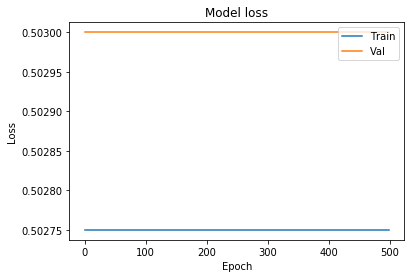

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

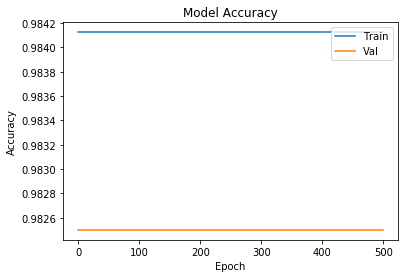

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Loading a Model

In [ ]:
# Load the model
# from tensorflow.keras.models import load_model
# eq_model = load_model("models/ml_model_fulldata.h5")